In [75]:
!pip install pystan~=2.14
!pip install fbprophet
!pip install pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import pandas_datareader as pdr

In [4]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
#stock = input("Enter the nasadq index: \n")
#df = pdr.get_data_yahoo(stock)
#df = pdr.get_data_yahoo('TSLA')

df=pd.read_csv("Tel4.csv")
df

,date,T2M,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
0,01-01-2015,24.88,59.88,2.19,161.25,0.41,0.27,4.31,96.03,8.27,0.23,-1.40015,0.96675,1.70148
1,02-01-2015,23.84,68.31,2.04,133.12,0.49,0.52,15.21,96.32,0.00,0.23,-1.74316,1.00767,2.01346
2,03-01-2015,21.12,82.81,1.99,184.25,0.29,0.55,12.55,96.52,2.02,0.23,-2.03657,1.02990,2.28217
3,04-01-2015,21.04,73.25,2.14,29.12,0.45,0.53,14.45,96.67,0.00,0.23,-2.26712,1.02739,2.48905
4,05-01-2015,19.63,61.25,2.20,33.19,0.65,0.51,13.36,96.66,0.00,0.23,-2.42346,0.99678,2.62044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,27-12-2021,22.11,71.12,1.46,148.25,0.40,0.50,14.68,96.64,0.00,-1.21,-0.70756,0.47105,0.85002
2553,28-12-2021,22.12,73.31,2.29,169.00,0.50,0.49,13.48,96.57,1.09,-1.21,-0.65159,0.47253,0.80489
2554,29-12-2021,21.57,72.88,1.91,156.25,0.51,0.48,14.69,96.57,9.80,-1.21,-0.55501,0.44320,0.71026
2555,30-12-2021,20.75,75.25,2.39,78.00,0.53,0.48,13.19,96.83,0.24,-1.21,-0.42160,0.38602,0.57163


In [161]:
df=df.reset_index()
df.rename(columns={'date': 'ds', 'T2M': 'y'}, inplace=True)

In [162]:
df

,index,ds,y,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
0,0,01-01-2015,24.88,59.88,2.19,161.25,0.41,0.27,4.31,96.03,8.27,0.23,-1.40015,0.96675,1.70148
1,1,02-01-2015,23.84,68.31,2.04,133.12,0.49,0.52,15.21,96.32,0.00,0.23,-1.74316,1.00767,2.01346
2,2,03-01-2015,21.12,82.81,1.99,184.25,0.29,0.55,12.55,96.52,2.02,0.23,-2.03657,1.02990,2.28217
3,3,04-01-2015,21.04,73.25,2.14,29.12,0.45,0.53,14.45,96.67,0.00,0.23,-2.26712,1.02739,2.48905
4,4,05-01-2015,19.63,61.25,2.20,33.19,0.65,0.51,13.36,96.66,0.00,0.23,-2.42346,0.99678,2.62044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,27-12-2021,22.11,71.12,1.46,148.25,0.40,0.50,14.68,96.64,0.00,-1.21,-0.70756,0.47105,0.85002
2553,2553,28-12-2021,22.12,73.31,2.29,169.00,0.50,0.49,13.48,96.57,1.09,-1.21,-0.65159,0.47253,0.80489
2554,2554,29-12-2021,21.57,72.88,1.91,156.25,0.51,0.48,14.69,96.57,9.80,-1.21,-0.55501,0.44320,0.71026
2555,2555,30-12-2021,20.75,75.25,2.39,78.00,0.53,0.48,13.19,96.83,0.24,-1.21,-0.42160,0.38602,0.57163


In [163]:
df.isna().sum()

index               0
ds                  0
y                   0
RH2M                0
WS2M                0
WD2M                0
ALLSKY_KT           0
GWETTOP             0
EVLAND              0
PS                  0
PRECIPITATIONCAL    0
MEI                 0
PC1                 0
PC2                 0
amplitude           0
dtype: int64

In [164]:
df.describe()

,index,y,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,1278.000000,27.014963,55.354681,2.363090,175.916277,0.547876,0.452628,21.102808,96.050735,2.656590,-0.071991,-0.006031,-0.000786,1.113203
std,738.286643,4.370876,23.499109,0.999364,84.369559,0.125646,0.251902,20.098377,0.422248,8.132676,0.963110,0.904152,0.872560,0.582394
min,0.000000,16.380000,7.690000,0.560000,14.120000,0.080000,0.110000,0.070000,94.830000,0.000000,-1.530000,-2.496940,-2.598810,0.011970
25%,639.000000,24.300000,32.940000,1.660000,101.940000,0.480000,0.200000,1.680000,95.700000,0.000000,-0.790000,-0.633300,-0.585890,0.673900
50%,1278.000000,26.390000,57.000000,2.080000,165.190000,0.590000,0.450000,15.210000,96.040000,0.000000,-0.240000,-0.024300,0.039390,1.039910
75%,1917.000000,29.490000,77.560000,2.820000,258.120000,0.640000,0.660000,37.280000,96.410000,1.090000,0.350000,0.635940,0.563920,1.491530
max,2556.000000,38.090000,95.500000,7.230000,345.690000,0.760000,0.980000,80.950000,97.020000,134.780000,2.210000,2.875470,2.840250,2.886400


In [165]:
df.describe

<bound method NDFrame.describe of       index          ds      y   RH2M  WS2M    WD2M  ALLSKY_KT  GWETTOP  \
0         0  01-01-2015  24.88  59.88  2.19  161.25       0.41     0.27   
1         1  02-01-2015  23.84  68.31  2.04  133.12       0.49     0.52   
2         2  03-01-2015  21.12  82.81  1.99  184.25       0.29     0.55   
3         3  04-01-2015  21.04  73.25  2.14   29.12       0.45     0.53   
4         4  05-01-2015  19.63  61.25  2.20   33.19       0.65     0.51   
...     ...         ...    ...    ...   ...     ...        ...      ...   
2552   2552  27-12-2021  22.11  71.12  1.46  148.25       0.40     0.50   
2553   2553  28-12-2021  22.12  73.31  2.29  169.00       0.50     0.49   
2554   2554  29-12-2021  21.57  72.88  1.91  156.25       0.51     0.48   
2555   2555  30-12-2021  20.75  75.25  2.39   78.00       0.53     0.48   
2556   2556  31-12-2021  21.08  71.81  1.65   85.12       0.56     0.48   

      EVLAND     PS  PRECIPITATIONCAL   MEI      PC1      PC2  am

In [166]:
df.shape

(2557, 15)

In [167]:
df=df.dropna()

In [168]:
import numpy as np
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
mean_imputer.fit_transform((df['y'].values).reshape(-1,1))

array([[24.88],
       [23.84],
       [21.12],
       ...,
       [21.57],
       [20.75],
       [21.08]])

<AxesSubplot:xlabel='y'>

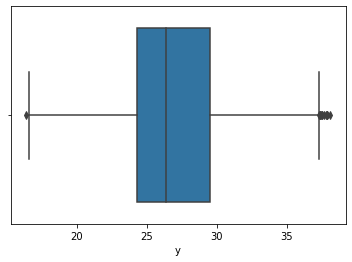

In [169]:
import seaborn as sns
sns.boxplot(x=df['y'])

In [170]:
# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)
# iqr = q3-q1
# print((df['y']<(q1-1.5*iqr)) | (df['y']>(q3+1.5*iqr)))

In [171]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [172]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [173]:
future_dates=model.make_future_dataframe(periods=30)

In [174]:
future_dates.tail()

,ds
2582,2022-01-26
2583,2022-01-27
2584,2022-01-28
2585,2022-01-29
2586,2022-01-30


In [175]:
prediction = model.predict(future_dates)

In [176]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2582,2022-01-26,25.940893,18.723624,27.802926,25.940869,25.940944,-2.945106,-2.945106,-2.945106,0.082039,0.082039,0.082039,-3.027145,-3.027145,-3.027145,0.0,0.0,0.0,22.995787
2583,2022-01-27,25.939657,18.567919,27.413724,25.939608,25.939720,-2.921703,-2.921703,-2.921703,-0.027444,-0.027444,-0.027444,-2.894259,-2.894259,-2.894259,0.0,0.0,0.0,23.017955
2584,2022-01-28,25.938422,18.349479,27.482904,25.938359,25.938499,-2.844202,-2.844202,-2.844202,-0.099140,-0.099140,-0.099140,-2.745062,-2.745062,-2.745062,0.0,0.0,0.0,23.094220
2585,2022-01-29,25.937186,18.850301,28.067991,25.937094,25.937311,-2.554494,-2.554494,-2.554494,0.027718,0.027718,0.027718,-2.582212,-2.582212,-2.582212,0.0,0.0,0.0,23.382692
2586,2022-01-30,25.935950,18.945711,27.653014,25.935839,25.936109,-2.385174,-2.385174,-2.385174,0.023520,0.023520,0.023520,-2.408694,-2.408694,-2.408694,0.0,0.0,0.0,23.550776


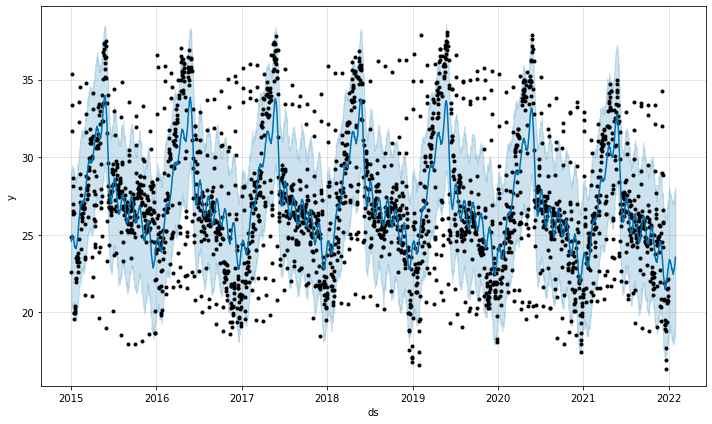

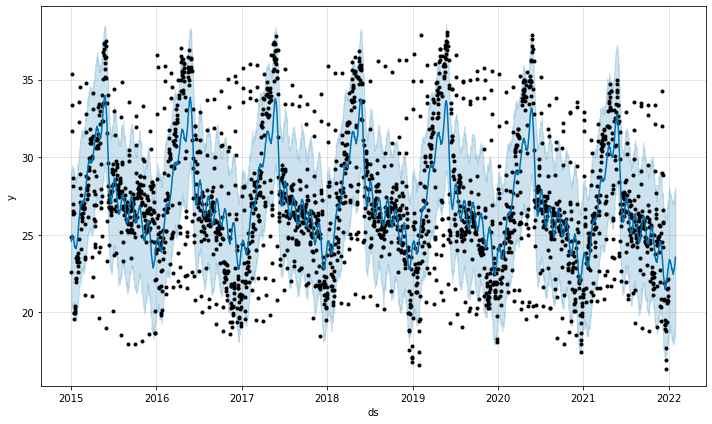

In [177]:
model.plot(prediction)

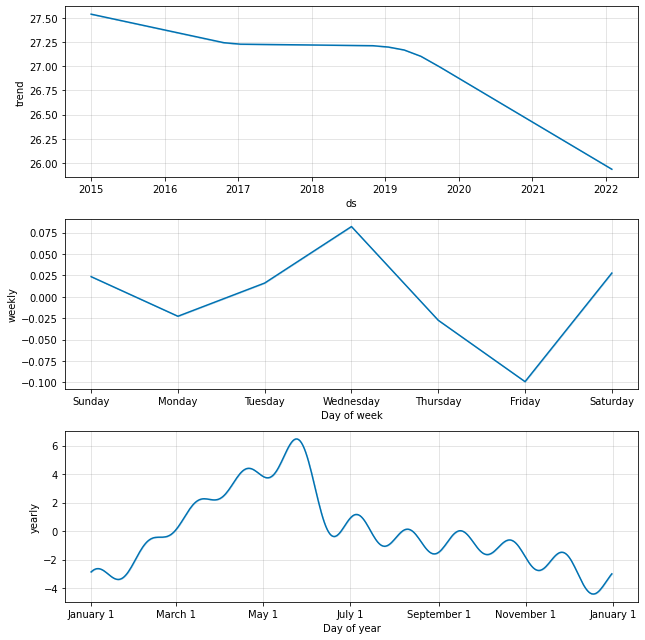

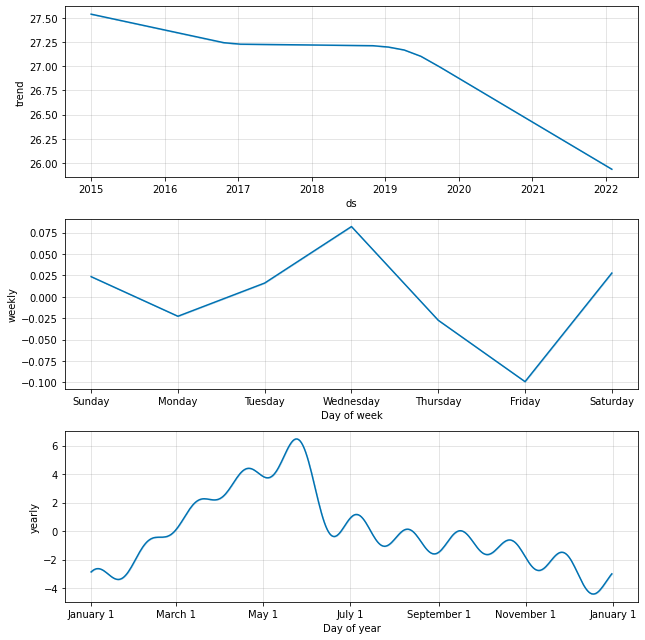

In [178]:
model.plot_components(prediction)

In [179]:
prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2527,2021-12-02,26.008861,19.657729,28.332823,26.008861,26.008861,-1.989555,-1.989555,-1.989555,-0.027444,-0.027444,-0.027444,-1.962111,-1.962111,-1.962111,0.0,0.0,0.0,24.019306
2528,2021-12-03,26.007625,19.327964,27.990271,26.007625,26.007625,-2.227160,-2.227160,-2.227160,-0.099140,-0.099140,-0.099140,-2.128020,-2.128020,-2.128020,0.0,0.0,0.0,23.780465
2529,2021-12-04,26.006389,18.916978,27.856537,26.006389,26.006389,-2.283983,-2.283983,-2.283983,0.027718,0.027718,0.027718,-2.311701,-2.311701,-2.311701,0.0,0.0,0.0,23.722406
2530,2021-12-05,26.005153,19.014784,27.804986,26.005153,26.005153,-2.485814,-2.485814,-2.485814,0.023520,0.023520,0.023520,-2.509334,-2.509334,-2.509334,0.0,0.0,0.0,23.519339
2531,2021-12-06,26.003918,19.012314,27.429473,26.003918,26.003918,-2.739446,-2.739446,-2.739446,-0.022744,-0.022744,-0.022744,-2.716703,-2.716703,-2.716703,0.0,0.0,0.0,23.264471
2532,2021-12-07,26.002682,18.663899,27.685693,26.002682,26.002682,-2.913266,-2.913266,-2.913266,0.016051,0.016051,0.016051,-2.929317,-2.929317,-2.929317,0.0,0.0,0.0,23.089416
2533,2021-12-08,26.001446,18.541637,27.613814,26.001446,26.001446,-3.060491,-3.060491,-3.060491,0.082039,0.082039,0.082039,-3.142530,-3.142530,-3.142530,0.0,0.0,0.0,22.940955
2534,2021-12-09,26.000210,17.982243,27.089505,26.000210,26.000210,-3.379111,-3.379111,-3.379111,-0.027444,-0.027444,-0.027444,-3.351667,-3.351667,-3.351667,0.0,0.0,0.0,22.621099
2535,2021-12-10,25.998974,17.576568,26.858488,25.998974,25.998974,-3.651295,-3.651295,-3.651295,-0.099140,-0.099140,-0.099140,-3.552155,-3.552155,-3.552155,0.0,0.0,0.0,22.347680
2536,2021-12-11,25.997739,17.763971,26.606576,25.997739,25.997739,-3.711926,-3.711926,-3.711926,0.027718,0.027718,0.027718,-3.739644,-3.739644,-3.739644,0.0,0.0,0.0,22.285813


In [180]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
print(sqrt(mean_squared_error(df["y"].iloc[-31:], prediction["yhat"].loc[2526:2556])))
print(mean_absolute_error(df["y"].iloc[-31:],prediction["yhat"].loc[2526:2556])) 
print(mean_absolute_percentage_error(df["y"].iloc[-31:],prediction["yhat"].loc[2526:2556]))

2.27920929256559
1.9197792733411068
0.09830333457387438
